In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

In [2]:
# Locally
# data_url = 'https://github.com/dmika1234/ml_uwr_22/blob/Project/Project/data/fake_job_postings.csv'
data_path = 'data/fake_job_postings.csv'
raw_data = pd.read_csv(data_path)


# For colab
# data_url = '/content/fake_job_postings.csv'
# raw_data = pd.read_csv(data_url, error_bad_lines=False, engine="python")
#straszny problem miałem, żeby wczytać te dane tak ja ty to robiłeś. dziwne błędy mi wyskakiwały

# Text data preprocessing

Removing punctuation, stop words and grouping together the different inflected forms of a word.

In [3]:
text_colnames = ['company_profile', 'description', 'requirements', 'benefits']
text_data = raw_data[['job_id'] + text_colnames]
text_data.fillna('', inplace = True)

tokenizer = RegexpTokenizer(r'\w+')
nltk.download('stopwords') 
nltk.download('wordnet')
nltk.download('omw-1.4')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

for i in range(text_data.shape[0]):
    for col in text_colnames:
        text_data.at[i,col] = tokenizer.tokenize(text_data.at[i,col].lower()) # removing punctuation
        filtered_sentence = []
        for w in text_data.at[i,col]:
            if w not in stop_words: # removing words such as “the”, “a”, “an”, “in”
                filtered_sentence.append(lemmatizer.lemmatize(w)) # grouping together the different inflected forms of a word 
        text_data.at[i,col] = np.array(filtered_sentence)

C:\Users\dmika\AppData\Local\Temp\ipykernel_11180\161478072.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_data.fillna('', inplace = True)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dmika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dmika\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dmika\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [4]:
text_data

,job_id,company_profile,description,requirements,benefits
0,1,"[food52, created, groundbreaking, award, winni...","[food52, fast, growing, james, beard, award, w...","[experience, content, management, system, majo...",[]
1,2,"[90, second, world, cloud, video, production, ...","[organised, focused, vibrant, awesome, passion...","[expect, key, responsibility, communicate, cli...","[get, usthrough, part, 90, second, team, gain,..."
2,3,"[valor, service, provides, workforce, solution...","[client, located, houston, actively, seeking, ...","[implement, pre, commissioning, commissioning,...",[]
3,4,"[passion, improving, quality, life, geography,...","[company, esri, environmental, system, researc...","[education, bachelor, master, gi, business, ad...","[culture, anything, corporate, collaborative, ..."
4,5,"[spotsource, solution, llc, global, human, cap...","[job, title, itemization, review, managerlocat...","[qualification, rn, license, state, texasdiplo...","[full, benefit, offered]"
...,...,...,...,...,...
17875,17876,"[vend, looking, awesome, new, talent, come, jo...","[case, first, time, visited, website, vend, aw...","[ace, role, eat, comprehensive, statement, wor...","[expect, u, open, culture, openly, share, resu..."
17876,17877,"[weblinc, e, commerce, platform, service, prov...","[payroll, accountant, focus, primarily, payrol...","[b, b, accounting, desire, fun, love, genuine,...","[health, amp, wellnessmedical, planprescriptio..."
17877,17878,"[provide, full, time, permanent, position, man...","[experienced, project, cost, control, staff, e...","[least, 12, year, professional, experience, ab...",[]
17878,17879,[],"[nemsia, studio, looking, experienced, visual,...","[1, must, fluent, latest, version, corel, amp,...","[competitive, salary, compensation, based, exp..."


Most popular words

In [5]:
all_words = {}
for column_name in text_colnames:
    all_words[column_name] = np.concatenate(text_data[column_name])

In [6]:
from collections import Counter

number_of_most_common_wrds = 1000
most_popular_words = {}
for column_name in text_colnames:
    count_words = Counter(all_words[column_name])
    most_popular_words[column_name] = np.array(count_words.most_common(number_of_most_common_wrds))[:,0]

In [7]:
most_popular_words['benefits']

array(['work', 'benefit', 'company', 'competitive', 'team', 'opportunity',
       'offer', 'salary', 'time', 'paid', 'amp', 'dental', 'full',
       'insurance', 'day', 'employee', 'environment', 'working',
       'package', 'hour', 'health', 'life', 'u', 'job', 'vacation',
       'training', 'medical', 'holiday', 'experience', 'career', 'office',
       'service', 'plan', 'vision', 'people', 'including', 'based',
       'great', 'part', 'year', 'free', 'new', 'well', 'pay', 'get',
       'compensation', 'bonus', 'business', 'see', 'also', 'growing',
       'please', 'one', 'position', 'development', 'month', 'best',
       'world', 'employment', '401k', 'make', 'option', 'fun', 'fast',
       'technology', 'flexible', 'description', 'term', 'disability',
       'product', 'growth', 'want', 'client', 'industry', 'per',
       'international', 'startup', 'professional', 'solution', 'personal',
       'lunch', 'provide', 'like', 'commission', 'sale', 'week',
       'excellent', 'exciting

# One-hot encoding

In [8]:
onehot_dfs = {}
for text_colname in text_colnames:
    onehot_array = np.zeros((text_data.shape[0], number_of_most_common_wrds))
    for i in np.arange(text_data.shape[0]):
        onehot_array[i] = np.isin(most_popular_words[text_colname], text_data[text_colname][i]).astype('int64')
    column_names = np.vectorize(lambda x: text_colname + '_' + str(x))(most_popular_words[text_colname])
    onehot_dfs[text_colname] = pd.DataFrame(onehot_array, columns=column_names)

# Preparing other columns to model

In [9]:
raw_data

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [10]:
working_df = raw_data.copy()

Spliting location into country, state, city

In [11]:
working_df[['country', 'state', 'city']] = working_df['location'].str.split(',', expand=True).iloc[:,0:3]

Splitting salary range into min, max salary

In [12]:
working_df[['salary_min', 'salary_max']] = working_df['salary_range'].str.split('-', expand=True)
working_df[['salary_min', 'salary_max']] = working_df[['salary_min', 'salary_max']].apply(pd.to_numeric, errors='coerce').fillna(-1)

Getting column names for later

In [13]:
target_colname = 'fraudulent'
# Getting numerical colnames and deleting not useful
numerical_colnames = list(working_df.select_dtypes(include='int64').columns)
numerical_colnames = list(set(numerical_colnames) - set(['job_id', target_colname]))
numerical_colnames = numerical_colnames + ['salary_min', 'salary_max']
# Getting other text colnames and deleting not useful
other_text_colnames = list(set(working_df.select_dtypes(include='object').columns) - set(text_colnames))
other_text_colnames = list(set(other_text_colnames) - set(['location', 'salary_range']))
print(numerical_colnames)
print(text_colnames)
print(other_text_colnames)

['telecommuting', 'has_company_logo', 'has_questions', 'salary_min', 'salary_max']
['company_profile', 'description', 'requirements', 'benefits']
['required_experience', 'title', 'employment_type', 'function', 'state', 'required_education', 'city', 'industry', 'country', 'department']


Filling missing values

In [14]:
working_df[text_colnames + other_text_colnames] = working_df[text_colnames + other_text_colnames].fillna('')
working_df[numerical_colnames] = working_df[numerical_colnames].fillna(0)

In [15]:
working_df[other_text_colnames].apply(lambda x: np.unique(x).shape[0]).sort_values()

employment_type            6
required_experience        8
required_education        14
function                  38
country                   91
industry                 132
state                    326
department              1338
city                    2336
title                  11231
dtype: int64

We will only use those with not so much levels(<50 for start)

In [16]:
final_other_text_colnames = ['employment_type', 'required_experience', 'required_education', 'function']

Creating final DataFrame for model

In [17]:
X = pd.get_dummies(working_df[final_other_text_colnames], columns=final_other_text_colnames)
# Join one-hot encoded text data
for text_colname in text_colnames:
    X = pd.concat((X, onehot_dfs[text_colname]), axis=1)
X[numerical_colnames] = working_df[numerical_colnames]
y = working_df[target_colname]
X

,employment_type_,employment_type_Contract,employment_type_Full-time,employment_type_Other,employment_type_Part-time,employment_type_Temporary,required_experience_,required_experience_Associate,required_experience_Director,required_experience_Entry level,...,benefits_solid,benefits_app,benefits_immediate,benefits_profitable,benefits_america,telecommuting,has_company_logo,has_questions,salary_min,salary_max
0,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,-1.0,-1.0
1,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,-1.0,-1.0
2,1,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,-1.0,-1.0
3,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,-1.0,-1.0
4,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,1,1,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,1,1,-1.0,-1.0
17876,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,1,1,-1.0,-1.0
17877,0,0,1,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,-1.0,-1.0
17878,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,-1.0,-1.0


Creating train-test split

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

First model

In [37]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train, y_train)

In [43]:
from sklearn.metrics import confusion_matrix, roc_auc_score


def evaluate_performance(y_test, y_proba, threshold=0.2, save_pred=False):
    y_pred = (y_proba >= threshold).astype('int64')
    results = {}
    if save_pred:
        results['y_pred'] = y_pred
    # Get the confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Calculate the detection percentage
    results['detection_percentage'] = tp / (tp + fn)
    # Calculate precision
    results['precision'] = tp / (tp + fp)
    # Calculate accuracy
    results['accuracy'] = (tp + tn) / (tp + tn + fp + fn)
    # Calculate F1-score
    results['f1_score'] = 2 * (results['precision'] * results['detection_percentage']) /\
                          (results['precision'] + results['detection_percentage'])
    results['auc_roc'] = roc_auc_score(y_test, y_proba)

    return results


In [21]:
y_proba = clf.predict_proba(X_test)[:, 1]
res = evaluate_performance(y_test, y_proba, threshold=0.1)
res

{'y_pred': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 'detection_percentage': 0.4942528735632184,
 'precision': 0.12951807228915663,
 'accuracy': 0.8137583892617449,
 'f1_score': 0.2052505966587112,
 'auc_roc': 0.7027171305587653}

In [22]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    return thresholds

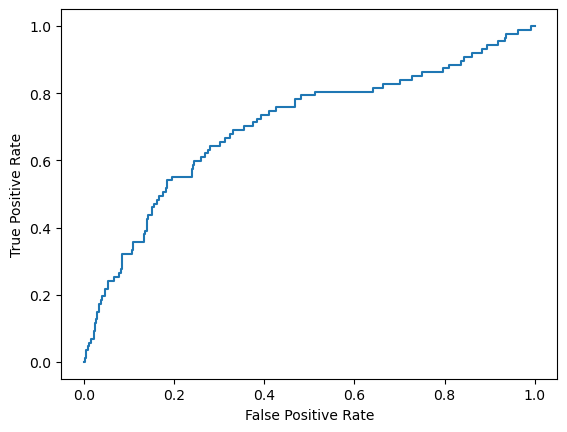

In [23]:
a = plot_roc_curve(y_test, y_proba)

In [24]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

Text(0, 0.5, 'True Positive Rate')

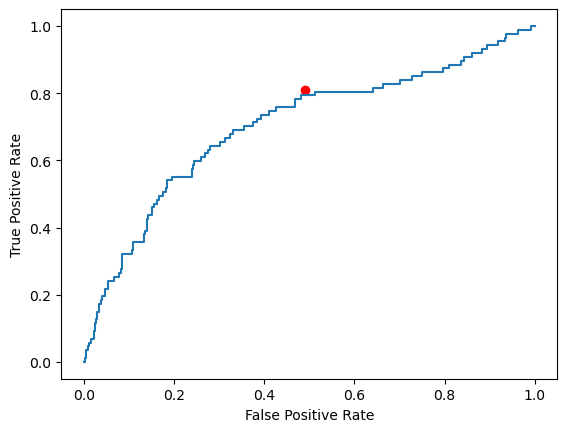

In [25]:
plt.plot(fpr, tpr)
plt.scatter([0.49], [0.81], color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Evaluate the model on validation dataset with different thresholds

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.08, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

In [46]:
y_proba = clf.predict_proba(X_val)[:, 1]

In [61]:
results = []
thresholds_vec = np.arange(0, 0.33, 0.01)
for i in thresholds_vec:
    res = evaluate_performance(y_val, y_proba, threshold=i)
    res['threshold'] = i
    results.append(res)

In [64]:

results = pd.DataFrame(results)


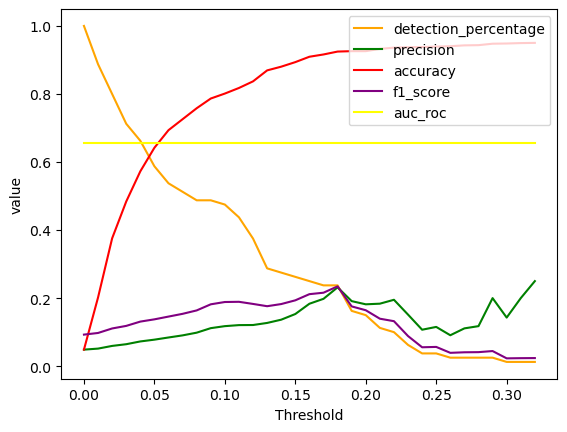

In [71]:
colors = ['blue', 'orange', 'green', 'red', 'purple', 'yellow']
j = 0
for column_name in results.columns[0:-1]:
    j += 1
    plt.plot(results.iloc[:,-1], results[column_name], label=column_name, color=colors[j])
plt.xlabel('Threshold')
plt.ylabel("Value")
plt.legend(loc=1)
plt.show()